
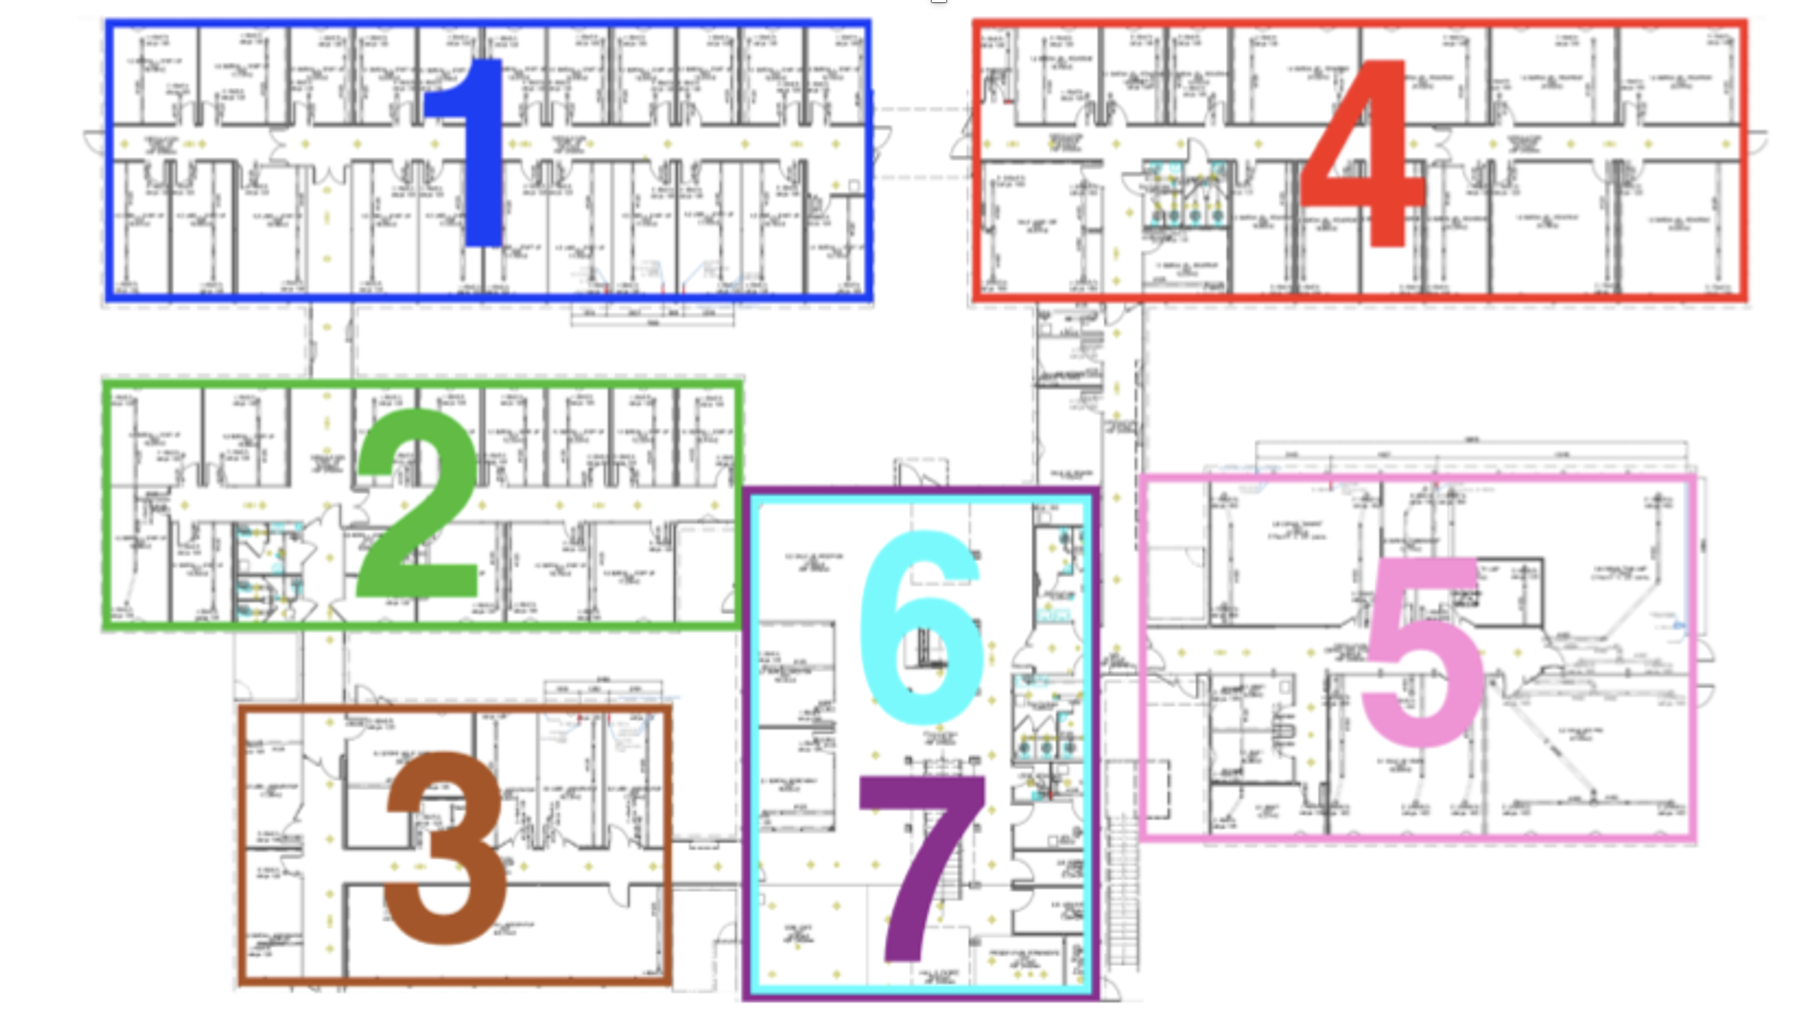

In [6]:
import folium
from PIL import Image

# Chargement de l'image et récupération de ses dimensions
img_path = 'building_zoning.png'
img = Image.open(img_path)
img_width, img_height = img.size

# Coordonnées du centre de la carte (à adapter selon votre plan)
latitude = 0.0
longitude = 0.0
img_scale = 0.000001

# Calcul des limites de la carte en fonction des dimensions de l'image
north_east = [latitude + img_height *img_scale, longitude + img_width * img_scale]
south_west = [latitude - img_height * img_scale, longitude - img_width * img_scale]

# Créez une carte Folium avec les limites automatiques
m = folium.Map(location=[latitude, longitude], zoom_start=18, control_scale=True, zoom_control=False, scrollWheelZoom=False)

# Ajoutez l'image comme fond de carte avec les limites automatiques

# Ajoutez l'image comme fond de carte
m.add_child(folium.LatLngPopup())
m.add_child(folium.raster_layers.ImageOverlay(
    img_path,
    bounds=[south_west, north_east],
    opacity=1,
    interactive=True,
    cross_origin=False,
    zindex=1
))
# Exemple de coordonnées pour les polygones représentant les salles (à adapter selon votre plan)
salle1_coords = [[latitude + 0.0002, longitude -0.0009], [latitude + 0.0002, longitude - 0.0002],
                [latitude - 0.0002, longitude  - 0.0002], [latitude - 0.0002, longitude -0.0009]
                ]
# Données supplémentaires pour la salle 1
salle1_data = {
    "Occupation": "50%",
    "Consommation": "100 kW"
}

# Créez un contenu HTML pour la fenêtre contextuelle
popup_content_salle1 = "<b>Salle 1</b><br>"
for key, value in salle1_data.items():
    popup_content_salle1 += f"{key}: {value}<br>"

# Ajoutez des polygones pour chaque salle avec des couleurs différentes
folium.Polygon(locations=salle1_coords, color='blue', fill_color='lightblue', fill_opacity=0.5,
               popup=folium.Popup(popup_content_salle1)).add_to(m)

"""# Affichez la carte
m.save('map.html')
"""
m

In [7]:
import dash
from dash import dcc, html
import plotly.graph_objs as go

# Données fictives pour la consommation et la production d'énergie par secteur
secteurs = ['Industrie', 'Résidentiel', 'Commercial']
consommation = [300, 400, 200]  # Consommation actuelle
production = [250, 350, 180]  # Production actuelle
consommation_semaine_precedente = [280, 380, 190]  # Consommation semaine précédente

# Calculer la différence entre la consommation actuelle et celle de la semaine précédente
difference_consommation = [consommation[i] - consommation_semaine_precedente[i] for i in range(len(secteurs))]

# Créer l'application Dash
app = dash.Dash(__name__)

# Layout de l'application
app.layout = html.Div([
    html.H1("Consommation et production d'énergie par secteur"),
    dcc.Graph(
        id='graph-energy',
        figure={
            'data': [
                {'x': secteurs, 'y': consommation, 'type': 'bar', 'name': 'Consommation actuelle'},
                {'x': secteurs, 'y': production, 'type': 'bar', 'name': 'Production actuelle'},
                {'x': secteurs, 'y': difference_consommation, 'type': 'scatter', 'mode': 'lines+markers', 'name': 'Différence semaine précédente'}
            ],
            'layout': {
                'title': "Consommation et production d'énergie par secteur",
                'yaxis': {'title': 'Énergie (kWh)'},
                'yaxis2': {'title': 'Différence par rapport à la semaine précédente (kWh)',
                           'overlaying': 'y',
                           'side': 'right'}
            }
        }
    )
])

# Exécuter l'application
if __name__ == '__main__':
    app.run_server(debug=True)
